In [128]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt

In [114]:
experiments, outcomes = load_results("data/generated/genscen_Gorssel_30_05-06-2021-17-18-16.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")

In [117]:
pca = PCA(n_components=1)
pca.fit(pd.DataFrame(outcomes).T)

PCA(n_components=1)

In [119]:
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]

In [113]:
y = pd.Series(pca.components_[0])
x = experiments[uncertainties]

In [136]:
prim_alg = prim.Prim(x, y > 0.2, threshold=0.8)

In [137]:
box1 = prim_alg.find_box()

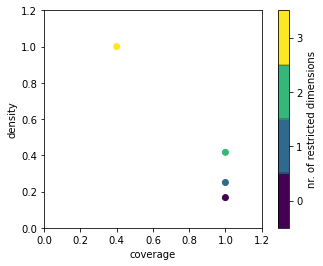

In [138]:
box1.show_tradeoff()
plt.show()

coverage         0.4
density          1.0
id                 3
mass        0.066667
mean             1.0
res_dim            3
Name: 3, dtype: object

                 box 3                                          
                   min          max                    qp values
A.4_Brate  {1.5, 10.0}  {1.5, 10.0}               [0.0625, -1.0]
A.5_Brate   {1.5, 1.0}   {1.5, 1.0}               [0.0625, -1.0]
2_RfR 1            0.5          1.0  [0.17361111111111113, -1.0]



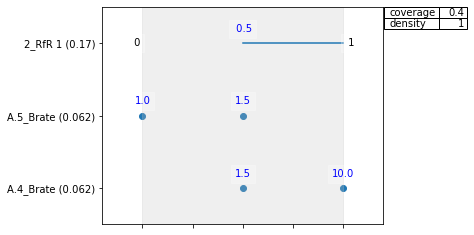

In [140]:
box1.inspect(3)
box1.inspect(3, style='graph')
plt.show()